In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
import pickle
import warnings
from collections import Counter
from sklearn import metrics
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df=pd.read_csv(r"./M2 final.csv")
#reading

In [43]:
df.shape
#shape check

(40434, 25)

In [44]:
df.corr().iloc[-1,:]
#Just see the last line for correlation with the variables 1
#corr check

MONTH               0.10
DAY_OF_MONTH       -0.05
DAY_OF_WEEK         0.02
DEP_DELAY           0.96
TAXI_OUT            0.22
CRS_ELAPSED_TIME   -0.07
DISTANCE           -0.07
CRS_DEP_M           0.04
DEP_TIME_M          0.13
WHEELS_OFF_M        0.13
CRS_ARR_M           0.04
Pred_Wheels_On      0.04
Temperature        -0.02
Dew Point           0.08
Humidity            0.10
Wind Speed          0.06
Wind Gust           0.07
Pressure           -0.11
sch_dep            -0.07
sch_arr            -0.09
ARR_DELAY           1.00
Name: ARR_DELAY, dtype: float64

<AxesSubplot:>

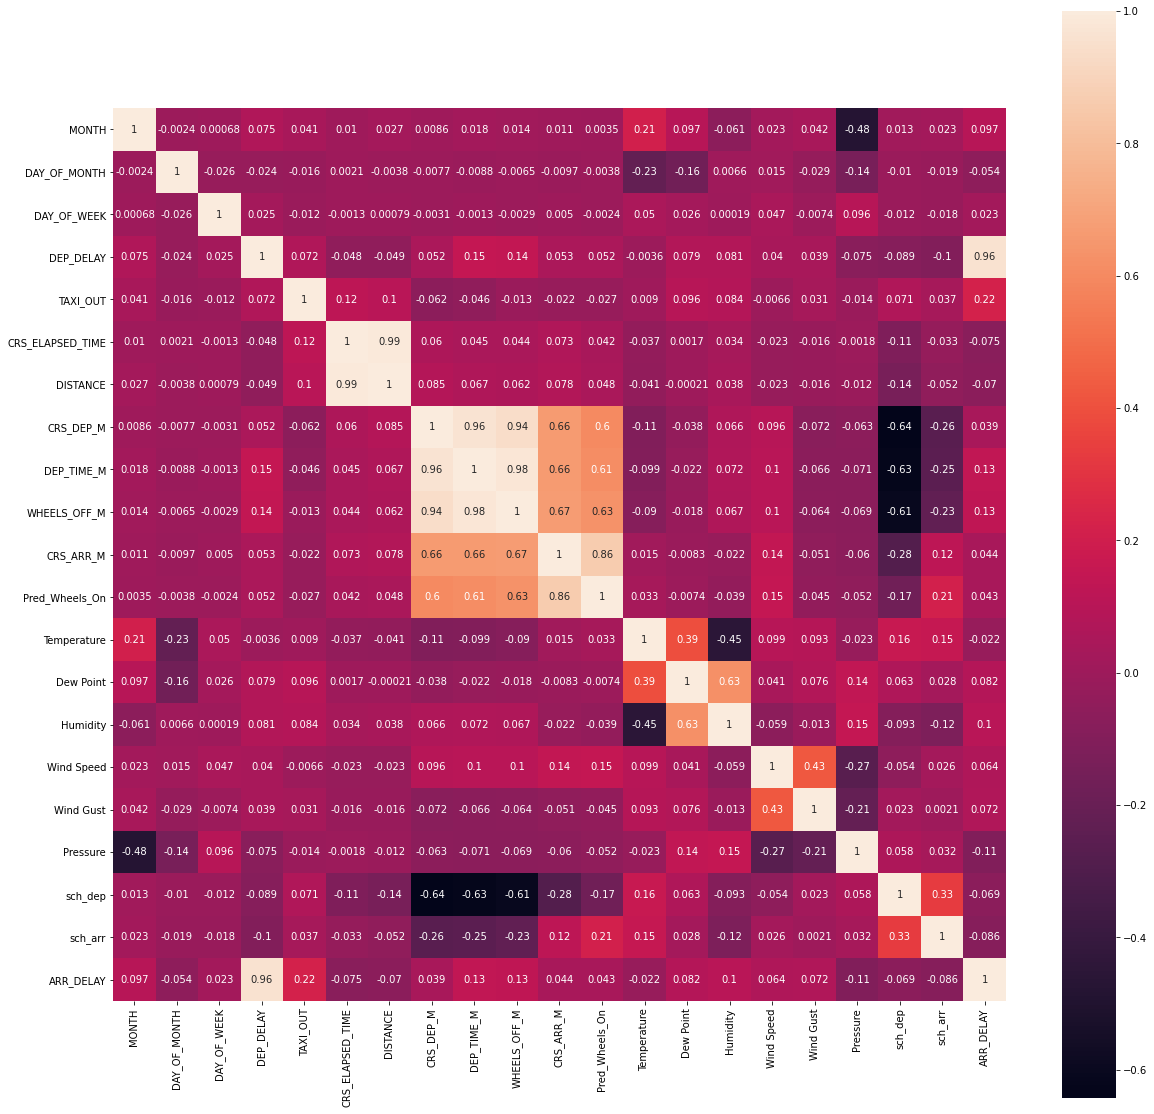

In [45]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True,annot =True)

In [3]:
print(df.isnull().values.any())
df.isnull().sum()
#null check

False


MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEP_DELAY            0
TAXI_OUT             0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
WHEELS_OFF_M         0
CRS_ARR_M            0
Pred_Wheels_On       0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
ARR_DELAY            0
dtype: int64

In [47]:
pd.set_option('display.max_colwidth', None)
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEP_DELAY,TAXI_OUT,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,ARR_DELAY
0,11,1,5,OO,BOI,-4,13,85,522,360,...,34,56,CALM,0,0,30.14,Fair,24,6,-29
1,11,1,5,OO,RDD,-9,14,73,199,365,...,36,47,CALM,0,0,30.16,Fair,28,23,-24
2,11,1,5,OO,ACV,-3,10,75,250,360,...,36,47,CALM,0,0,30.16,Fair,28,23,-14
3,11,1,5,OO,PHX,-5,13,133,651,305,...,36,47,CALM,0,0,30.16,Fair,28,23,-20
4,11,1,5,OO,SBA,-3,11,79,262,360,...,36,47,CALM,0,0,30.16,Fair,28,23,-14


In [48]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,TAXI_OUT,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,WHEELS_OFF_M,...,Pred_Wheels_On,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,ARR_DELAY
count,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,...,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00,40434.00
mean,8.00,15.82,3.97,16.12,19.17,203.29,1191.25,809.49,821.20,837.27,...,890.48,54.99,46.23,73.54,8.39,1.12,30.08,29.09,31.68,8.14
std,4.97,8.85,2.00,57.48,10.78,118.10,893.51,295.84,302.98,303.78,...,333.49,4.62,4.95,12.31,5.99,5.78,0.18,9.50,10.50,61.58
min,1.00,1.00,1.00,-32.00,1.00,48.00,66.00,14.00,1.00,1.00,...,0.00,41.00,29.00,23.00,0.00,0.00,29.50,0.00,0.00,-78.00
25%,1.00,8.00,2.00,-6.00,12.00,99.00,414.00,533.00,549.00,569.00,...,634.00,52.00,43.00,67.00,5.00,0.00,29.99,23.00,26.00,-20.00
50%,11.00,16.00,4.00,-2.00,16.00,140.00,679.00,820.00,834.00,849.00,...,897.00,55.00,47.00,75.00,7.00,0.00,30.10,29.00,31.00,-8.00
75%,12.00,23.00,6.00,12.00,23.00,305.00,2139.00,1070.00,1082.00,1099.00,...,1184.00,58.00,50.00,83.00,12.00,0.00,30.19,36.00,39.00,13.00
max,12.00,31.00,7.00,1912.00,155.00,428.00,2704.00,1439.00,1439.00,1439.00,...,1440.00,73.00,57.00,97.00,36.00,47.00,30.58,54.00,56.00,1909.00


In [4]:
# Assigning Variables
x=df.iloc[:,:-1]
x=x.drop(['Condition'],axis=1)
y=df.iloc[:,-1]
y=y-x['DEP_DELAY']
x=x[y>0]
y=y[y>0]
print(y.shape)
x=x.reset_index(drop=True)
y=y.reset_index(drop=True)
x.shape

(10188,)


(10188, 23)

In [5]:
x.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
ORIGIN                object
DEP_DELAY              int64
TAXI_OUT               int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
WHEELS_OFF_M           int64
CRS_ARR_M              int64
Pred_Wheels_On         int64
Temperature            int64
Dew Point              int64
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
sch_dep                int64
sch_arr                int64
dtype: object

In [6]:
def v(a):
    if a<5:return 0
    elif a<10: return 1
    elif a<15: return 2
    elif a<20: return 3
    elif a<30: return 4
    else: return 5
y=y.apply(v)
y.value_counts()

0    2559
1    2359
2    1625
4    1283
5    1227
3    1135
dtype: int64

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(x_train.shape,x_test.shape)

(9169, 23) (1019, 23)


In [8]:
y_test.value_counts()

0    275
1    223
2    159
4    130
5    118
3    114
dtype: int64

In [54]:
'''
x1=x[y==1]
y1=y[y==1]
x_train,x_test,y_train,y_test=train_test_split(x[y==0],y[y==0],test_size=4043/(x[y==0].shape[0]))
x3=pd.concat([x_train,x1],axis=0).reset_index(drop=True)
y3=pd.concat([y_train,y1],axis=0).reset_index(drop=True)
print(x3.shape,x_test.shape)
x_train,x_val,y_train,y_val=train_test_split(x3,y3,test_size=(0.1/0.9))
print(x_train.shape,x_test.shape,x_val.shape)
print(y_train.shape,y_test.shape,y_val.shape)
'''

'\nx1=x[y==1]\ny1=y[y==1]\nx_train,x_test,y_train,y_test=train_test_split(x[y==0],y[y==0],test_size=4043/(x[y==0].shape[0]))\nx3=pd.concat([x_train,x1],axis=0).reset_index(drop=True)\ny3=pd.concat([y_train,y1],axis=0).reset_index(drop=True)\nprint(x3.shape,x_test.shape)\nx_train,x_val,y_train,y_val=train_test_split(x3,y3,test_size=(0.1/0.9))\nprint(x_train.shape,x_test.shape,x_val.shape)\nprint(y_train.shape,y_test.shape,y_val.shape)\n'

In [9]:
category_list=['OP_UNIQUE_CARRIER','ORIGIN','Wind']
#cat_var=['OP_UNIQUE_CARRIER','ORIGIN','Wind','Condition','MONTH','DAY_OF_MONTH','DAY_OF_WEEK']
cat_var=[]

In [10]:
from sklearn.preprocessing import LabelEncoder 
lb_make = LabelEncoder() 
for s in category_list: 
    x_train[s] = lb_make.fit_transform(x_train[s]) 
    x_test[s] = lb_make.transform(x_test[s]) 
    print(lb_make.transform(lb_make.classes_))
    print(lb_make.classes_)
for s in cat_var: 
    x_train[s] = x_train[s].astype('category') 
    x_test[s]=x_test[s].astype('category') 
print(x_train.shape,x_test.shape) 
x_train.columns

[0 1 2 3 4 5 6 7 8]
['AA' 'AS' 'B6' 'DL' 'F9' 'HA' 'OO' 'UA' 'WN']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81]
['ABQ' 'ACV' 'ASE' 'ATL' 'AUS' 'BFL' 'BNA' 'BOI' 'BOS' 'BUR' 'BWI' 'BZN'
 'CLE' 'CLT' 'CMH' 'CVG' 'DAL' 'DCA' 'DEN' 'DFW' 'DTW' 'EGE' 'EUG' 'EWR'
 'FAT' 'FLL' 'GEG' 'HDN' 'HNL' 'IAD' 'IAH' 'IND' 'JAC' 'JFK' 'KOA' 'LAS'
 'LAX' 'LGB' 'LIH' 'MCI' 'MCO' 'MDW' 'MFR' 'MIA' 'MMH' 'MRY' 'MSN' 'MSP'
 'MSY' 'MTJ' 'OGG' 'OKC' 'OMA' 'ONT' 'ORD' 'OTH' 'PAE' 'PDX' 'PHL' 'PHX'
 'PIT' 'PSC' 'PSP' 'RDD' 'RDM' 'RDU' 'RNO' 'SAN' 'SAT' 'SBA' 'SBP' 'SEA'
 'SLC' 'SMF' 'SNA' 'STL' 'STS' 'SUN' 'TPA' 'TUS' 'TWF' 'XNA']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
['CALM' 'E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW'
 'SW' 'VAR' 'W' 'WNW' 'WSW']
(9169, 23) (1019, 23)


<ipython-input-10-a96db2006d9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[s] = lb_make.fit_transform(x_train[s])
<ipython-input-10-a96db2006d9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[s] = lb_make.transform(x_test[s])


Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'WHEELS_OFF_M', 'CRS_ARR_M', 'Pred_Wheels_On',
       'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed',
       'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr'],
      dtype='object')

In [11]:
columns={'MONTH':'month','DAY_OF_MONTH':'day','DAY_OF_WEEK':'week','OP_UNIQUE_CARRIER':'airline','ORIGIN':'ori',
       'DEP_DELAY':'dep_del','TAXI_OUT':'taxi','CRS_ELAPSED_TIME':'sch_elp', 'DISTANCE':'dist', 'CRS_DEP_M':'sch_dep_m',
       'DEP_TIME_M':'act_dep_m','WHEELS_OFF_M':'wh_off','Pred_Wheels_On':'wh_on','CRS_ARR_M':'sch_arr_m','Temperature':'temp', 'Dew Point':'dew', 'Humidity':'hum', 'Wind':'wind','Wind Speed':'w_spd',
       'Wind Gust':'gust', 'Pressure':'pres', 'Condition':'cond'}
cat_var=list(map(lambda st: columns[st],cat_var))
x_train=x_train.rename(columns=columns)
x_test=x_test.rename(columns=columns)
print(cat_var)
#print(x3_train.dtypes,x3_test.dtypes)

[]


In [12]:
x_train.to_csv("x_train3.csv",index=False)
x_test.to_csv("x_test3.csv",index=False)
y_train.to_csv("y_train3.csv",index=False)
y_test.to_csv("y_test3.csv",index=False)

In [2]:
x_train=pd.read_csv("x_train3.csv")
x_test=pd.read_csv("x_test3.csv")
y_train=pd.read_csv("y_train3.csv")
y_test=pd.read_csv("y_test3.csv")

In [14]:
import lightgbm as lgb
import catboost as ctb
from hyperopt import fmin, tpe, hp,STATUS_OK, STATUS_FAIL, Trials
from hyperopt.pyll import scope


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test=x_test
        self.y_test=y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        return result, trials

    def lgb_clf(self, para):
        reg = lgb.LGBMClassifier(**para['clf_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['clf_params'])
        return self.train_reg(reg, para)

    def train_reg(self, clf, para):
        clf.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = clf.predict_proba(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [15]:
for i in cat_var:
    x3[i]=x3[i].astype('category')

In [16]:
lgb_clf_params = {
    'learning_rate':  hp.uniform('learning_rate',0.1,0.3),
    'reg_alpha':  hp.uniform('reg_alpha', 0.1,8),
    'reg_lambda': hp.uniform('reg_lambda', 0.1,8),
    'is_unbalance':True,
    'objective':'multiclass',
    'metric':'multi_logloss',
    'min_child_samples': scope.int(hp.quniform('min_child_samples', 3, 20, q=1)),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7,1),
    'n_estimators': scope.int(hp.quniform('n_estimators', 10000, 35000, q=1))
}
lgb_fit_params = {
    'eval_metric': 'multi_logloss',
    'early_stopping_rounds': 25,
    'verbose': False,
    'categorical_feature': cat_var
}
lgb_para = dict()
lgb_para['clf_params'] = lgb_clf_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: metrics.log_loss(y, pred,labels=y)

In [17]:
obj=HPOpt(x_train,x_test,y_train,y_test)
warnings.filterwarnings("ignore")

lgb_opt,trials= obj.process(fn_name='lgb_clf', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=1000)
lgb_opt['n_estimators']=int(lgb_opt['n_estimators'])
lgb_opt['min_child_samples']=int(lgb_opt['min_child_samples'])
reg_ = lgb.LGBMClassifier(**lgb_opt)
reg_.fit(x_train,y_train)
print(metrics.log_loss(y_test,reg5.predict_proba(x_test),labels=y_test))
print(metrics.classification_report(y_test,reg_.predict(x_test)))
reg5=reg_
y_pred=reg5.predict(x_test)
temp=np.zeros((len(y_pred),6))
for i in range(0,len(y_pred)):
    temp[i][y_pred[i]]=1
temp2=np.zeros((len(y_pred),6))
y_t=y_test.reset_index(drop=True)
for i in range(0,len(y_pred)):
    temp2[i][y_t[i]]=1
print(metrics.roc_auc_score(temp2,temp, average='macro',multi_class='ovr'))
print(lgb_opt)

100%|██████████| 1000/1000 [14:28<00:00,  1.15trial/s, best loss: 1.5543007712125974]


NameError: name 'reg5' is not defined

In [ ]:
reg5=reg_

In [126]:
'''
fpr, tpr, thresholds=metrics.roc_curve(y_test,prob)
J = tpr - fpr
ix = np.argmax(J)
thr=J[ix]
print(thr)
cal=CalibratedClassifierCV(reg5, cv=2, method='sigmoid')
cal.fit(x3, y3)
prob = cal.predict_proba(x_test)[:, 1]
prob_l=prob
for i in range(0,len(prob)):
    prob_l[i]= int(prob[i]>=thr)
    
print(metrics.average_precision_score(y_test,reg5.predict(x_test)))
print(metrics.classification_report(y_test,prob),metrics.classification_report(y_test,prob_l),metrics.classification_report(y_test,reg5.predict(x_test)))
print(metrics.roc_auc_score(y_test,prob),metrics.roc_auc_score(y_test,prob_l),metrics.roc_auc_score(y_test,reg5.predict(x_test)))
'''

"\nfpr, tpr, thresholds=metrics.roc_curve(y_test,prob)\nJ = tpr - fpr\nix = np.argmax(J)\nthr=J[ix]\nprint(thr)\ncal=CalibratedClassifierCV(reg5, cv=2, method='sigmoid')\ncal.fit(x3, y3)\nprob = cal.predict_proba(x_test)[:, 1]\nprob_l=prob\nfor i in range(0,len(prob)):\n    prob_l[i]= int(prob[i]>=thr)\n    \nprint(metrics.average_precision_score(y_test,reg5.predict(x_test)))\nprint(metrics.classification_report(y_test,prob),metrics.classification_report(y_test,prob_l),metrics.classification_report(y_test,reg5.predict(x_test)))\nprint(metrics.roc_auc_score(y_test,prob),metrics.roc_auc_score(y_test,prob_l),metrics.roc_auc_score(y_test,reg5.predict(x_test)))\n"

In [ ]:
#thresholds = np.arange(0, 1, 0.001)
#print(metrics.average_precision_score(reg5.predict(x_test),y_test))
print(metrics.log_loss(y_test,reg5.predict_proba(x_test),labels=y_test))
print(metrics.classification_report(y_test,reg5.predict(x_test)))
y_pred=reg5.predict(x_test)
temp=np.zeros((len(y_pred),6))
for i in range(0,len(y_pred)):
    temp[i][y_pred[i]]=1
temp2=np.zeros((len(y_pred),6))
y_t=y_test.reset_index(drop=True)
for i in range(0,len(y_t)):
    print(i,y_t[i])
    temp2[i][y_t[i]]=1
print(metrics.roc_auc_score(temp2,temp, average='macro',multi_class='ovr'))
print(lgb_opt)

In [ ]:
reg5.booster_.save_model('arr_light_all_class.txt')

In [ ]:

reg5.booster_.save_model('arr_light_all_class.txt')

defaultdict(<class 'collections.OrderedDict'>, {})


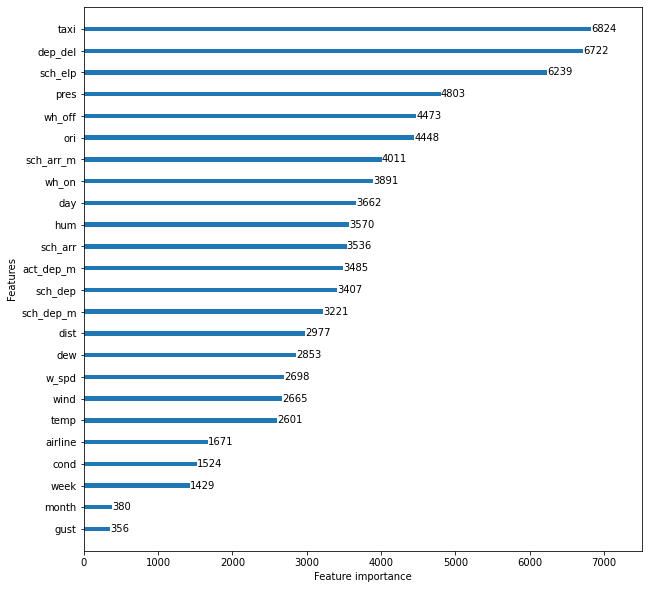

In [68]:
print(reg5.best_score_)
lgb.plot_importance(reg5,grid=False, figsize=(10,10), title=None)
plt.show()

In [6]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
lgbm = LGBMClassifier()
model1= lgb.Booster(model_file=r'./arr_light_all_class.txt')
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [7]:
modelt=model1
modelt.params["objective"] = "regression"
explainer = shap.TreeExplainer(modelt)
print(modelt.attr('objective'))

None


In [8]:
shap_values = explainer.shap_values(x_train)

In [9]:
print(len(shap_values))
print(x_train.shape)
len(shap_values[0])

6
(9169, 24)


9169

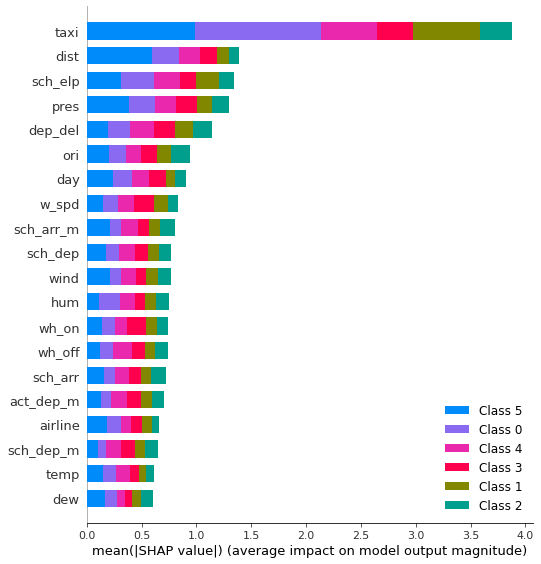

In [12]:
shap.summary_plot(shap_values, x_train)

In [18]:
#this is obtained per class
for i in range(0,len(x3.columns)):
    print(x3.columns[i],i)
    inds = shap.approximate_interactions(i,shap_values[1], x3)
    for i in range(3):
        shap.dependence_plot(x3.columns[i], shap_values[1], x3, interaction_index=inds[i])

NameError: name 'x3' is not defined

In [10]:
explainer.expected_value

[-2.3428856411600996,
 -2.1302349166698407,
 -2.648358539356991,
 -3.1876721707768545,
 -3.163538002478562,
 -4.036767455626157]

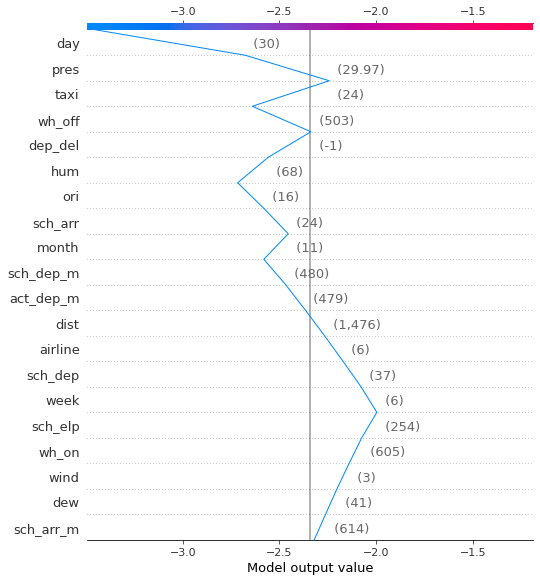

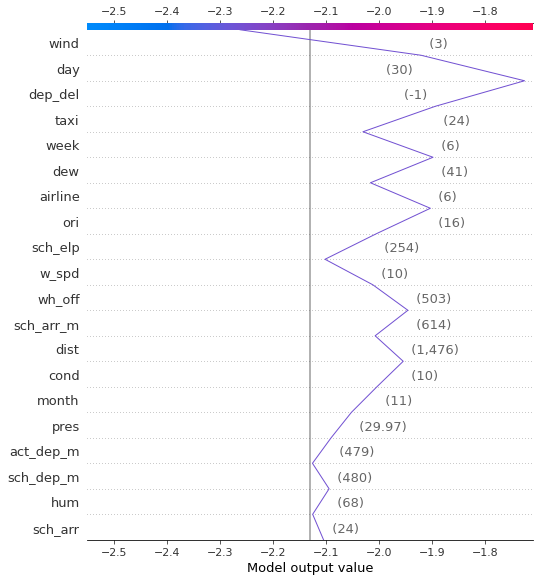

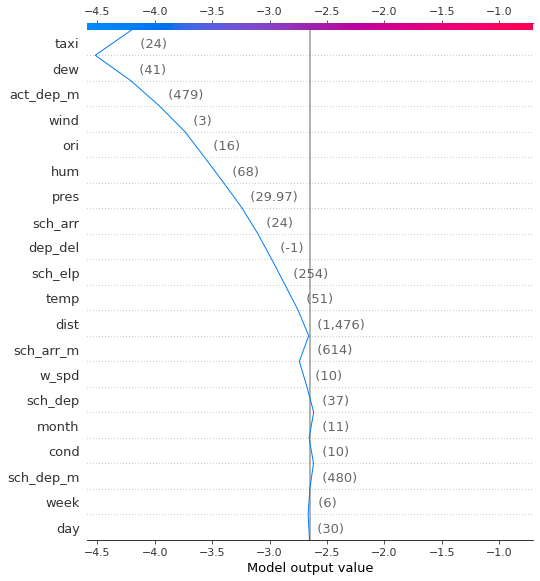

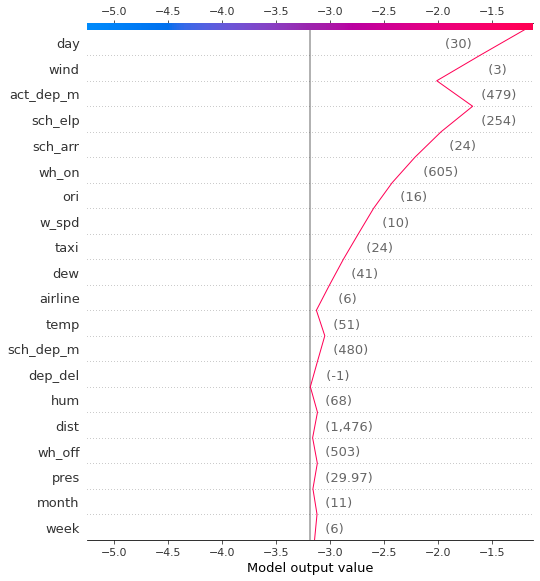

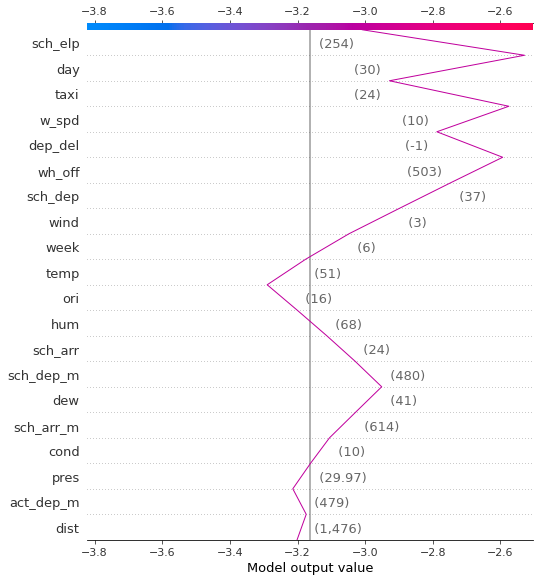

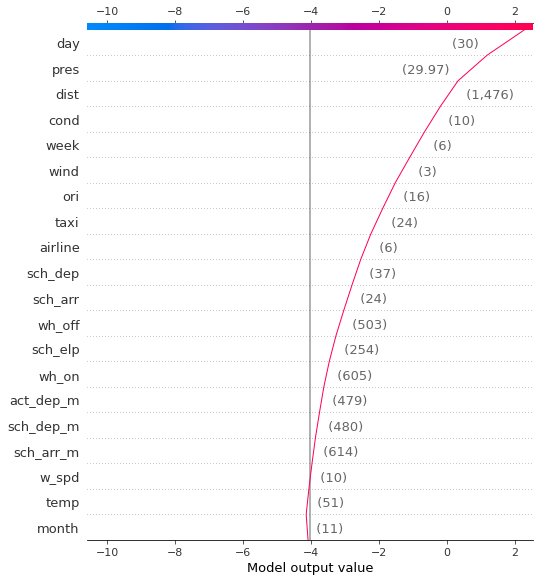

In [16]:
#for thresholds
for i in range(0,6):
    shap.decision_plot(explainer.expected_value[i], shap_values[i][:1], x_train.iloc[:1])

In [59]:
###class check
##print(x_train.iloc[0,:])
##fo##r i in range(0,len(x_test)):
   ## if int(x_test.loc[i,'ori'])==29:
  ##      print(i)
#print("done")
#print(x_test['ori'].value_counts()[29])
#x_train['ori'].value_counts()[29]

In [11]:
##x-train opti
for j,i in enumerate(x_train.columns):
    print(i,j)

month 0
day 1
week 2
airline 3
ori 4
dep_del 5
taxi 6
sch_elp 7
dist 8
sch_dep_m 9
act_dep_m 10
wh_off 11
sch_arr_m 12
wh_on 13
temp 14
dew 15
hum 16
wind 17
w_spd 18
gust 19
pres 20
cond 21
sch_dep 22
sch_arr 23


In [12]:
k=4
print(x_test.iloc[k,:])
print(model1.predict(x_test.iloc[k,:]))
print(y_test.iloc[k,:],np.argmax(model1.predict(x_test.iloc[k,:])))

month         12.00
day           23.00
week           1.00
airline        7.00
ori           45.00
dep_del      -13.00
taxi          21.00
sch_elp      297.00
dist        2338.00
sch_dep_m   1323.00
act_dep_m   1310.00
wh_off      1331.00
sch_arr_m    300.00
wh_on        279.00
temp          42.00
dew           39.00
hum           89.00
wind          15.00
w_spd          6.00
gust           0.00
pres          29.89
cond           2.00
sch_dep        0.00
sch_arr        2.00
Name: 4, dtype: float64
[[0.17218892 0.26606579 0.31329412 0.15449787 0.09008426 0.00386904]]
0    1
Name: 4, dtype: int64 2


Converting data to scipy sparse matrix.


In [17]:
#df2==taxi,df=arrival
k=4
fl=0
point=x_test.iloc[k:k+2,:].copy(deep=True) 
prob=model1.predict(point.iloc[0,:])
pred=np.argmax(prob)
print(pred)
p=prob[0][pred]
print(p)
print(y_test['0'][k])
for i in range(45,0,-1):
    point.iloc[0,6]=i
    point.iloc[0,11]=point.iloc[0,6]+point.iloc[0,10]
    #ls=explainer.shap_values(point)
    temp=model1.predict(point.iloc[0,:])
    if pred>np.argmax(temp):
        fl=1
        pred=np.argmax(temp)
        p=0
    if fl==0 and p>temp[0][pred]:
        p=temp[0][pred]
        print(temp,i,np.argmax(temp))
    if fl==1 and p<temp[0][pred]:
        p=temp[0][pred]
        print(temp,i,np.argmax(temp))

2
0.31329412281141117
1
[[0.01742561 0.3466588  0.30944981 0.14188465 0.11083795 0.07374318]] 43 1
[[0.01834393 0.36673406 0.29485468 0.13245186 0.11382425 0.07379122]] 42 1
[[0.02124083 0.38085913 0.30117023 0.13528887 0.08606916 0.07537177]] 41 1
[[0.06952707 0.40426668 0.41411796 0.06089894 0.04874677 0.0024426 ]] 26 2
[[0.07678782 0.41629848 0.39652844 0.06169524 0.04642475 0.00226527]] 25 1
[[0.25659971 0.24900994 0.21735263 0.11640345 0.15587645 0.00475781]] 18 0
[[0.29051568 0.25079593 0.18957443 0.10158094 0.16229899 0.00523404]] 17 0
[[0.35944494 0.35772008 0.07760237 0.07205977 0.13027603 0.00289682]] 15 0
[[0.39851723 0.41826578 0.07119901 0.07487735 0.03422854 0.00291208]] 14 1
[[0.4046391  0.39665831 0.0798572  0.05735438 0.05823066 0.00326035]] 4 0


In [4]:
import lightgbm as lgb
import catboost as ctb
from hyperopt import fmin, tpe, hp,STATUS_OK, STATUS_FAIL, Trials
from hyperopt.pyll import scope


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test=x_test
        self.y_test=y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        return result, trials

    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [6]:
lgb_reg_params = {
    'learning_rate':  hp.uniform('learning_rate',0.1,0.25),
    'reg_alpha':  hp.uniform('reg_alpha', 0.1,20),
    'reg_lambda': hp.uniform('reg_lambda', 0.1,20),
    'min_child_samples': scope.int(hp.quniform('min_child_samples', 3, 20, q=1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 1000, 15000, q=1))
}
lgb_fit_params = {
    'eval_metric': 'l1',
    'early_stopping_rounds': 20,
    'verbose': False,
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: mean_squared_error(y, pred)

In [7]:
obj=HPOpt(x_train,x_test,y_train,y_test)
warnings.filterwarnings("ignore")

lgb_opt,trials= obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=1000)
lgb_opt['n_estimators']=int(lgb_opt['n_estimators'])
lgb_opt['min_child_samples']=int(lgb_opt['min_child_samples'])
reg_ = lgb.LGBMRegressor(**lgb_opt)
reg_.fit(x_train,y_train)
print(mean_absolute_error(reg_.predict(x_train),y_train))
print(mean_absolute_error(reg_.predict(x_test),y_test))
print(lgb_opt)

100%|██████████| 1000/1000 [04:43<00:00,  3.52trial/s, best loss: 1.8023752298878697]
0.7570755106360715
1.0868494880851054
{'learning_rate': 0.21443741832700094, 'min_child_samples': 16, 'n_estimators': 4091, 'reg_alpha': 18.863142204372263, 'reg_lambda': 5.932125759970577}


In [11]:
modelt=reg_
import shap
#modelt.params["objective"] = "regression"
explainer = shap.TreeExplainer(modelt)
#print(modelt.attr('objective'))

In [12]:
shap_values = explainer.shap_values(x_train)

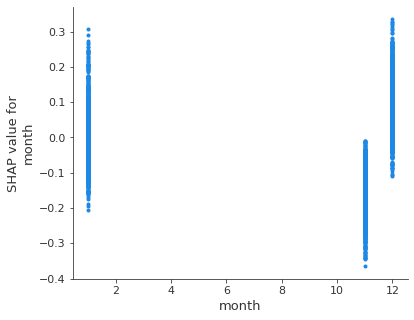

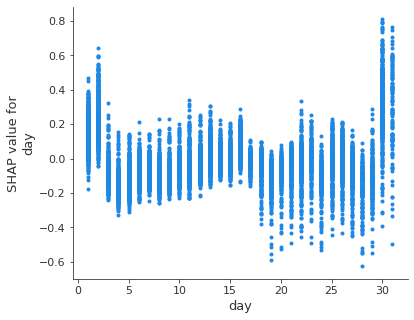

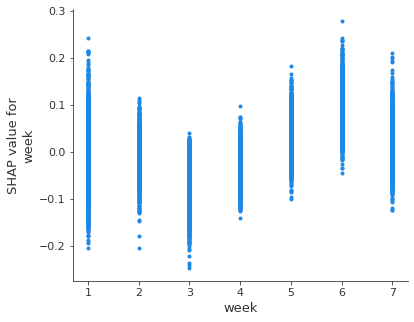

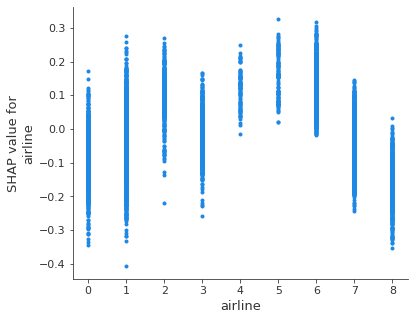

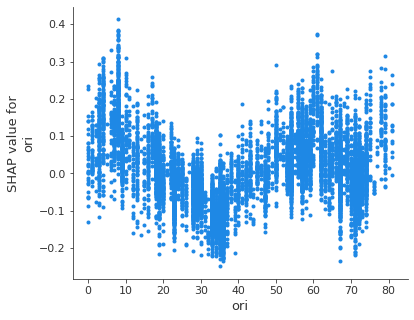

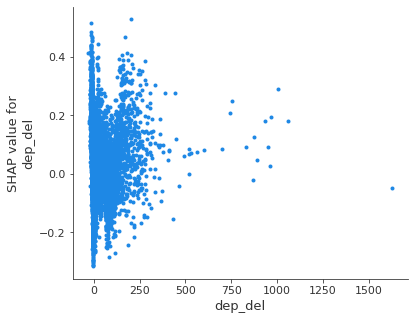

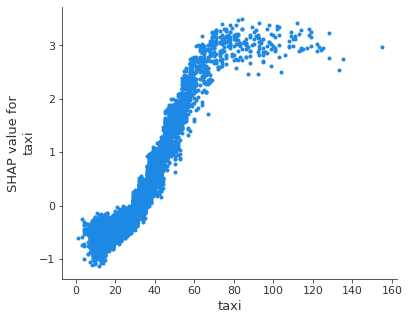

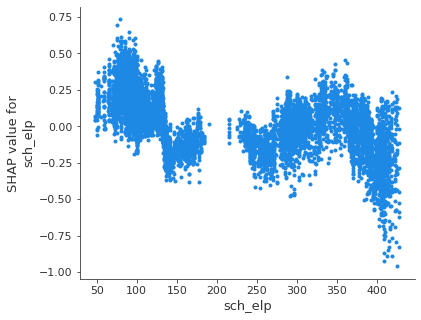

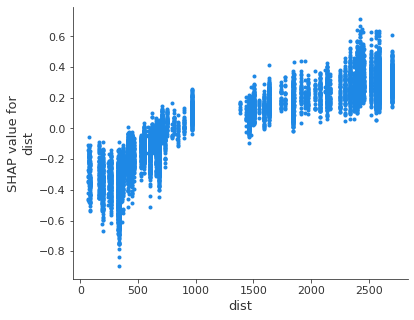

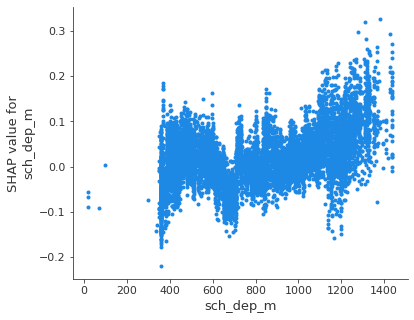

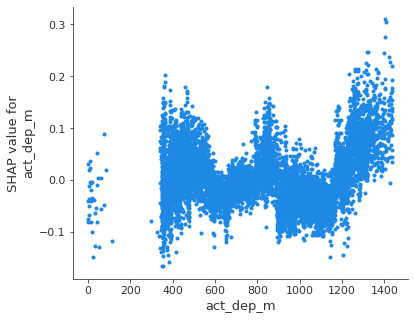

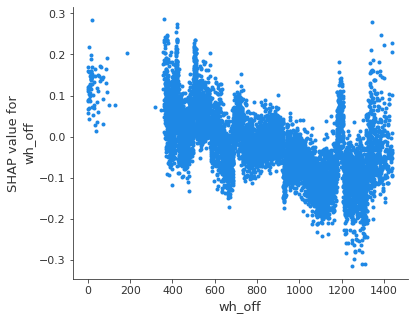

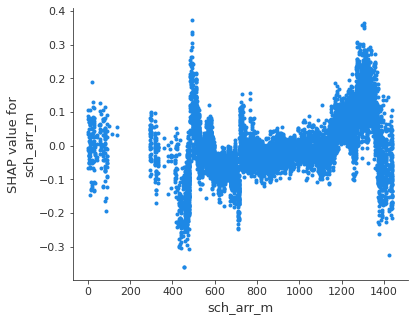

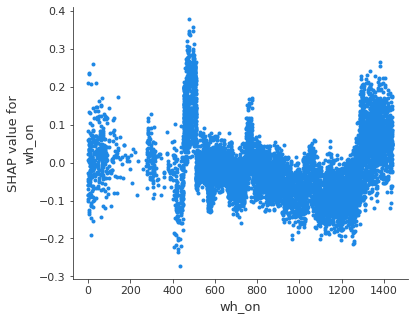

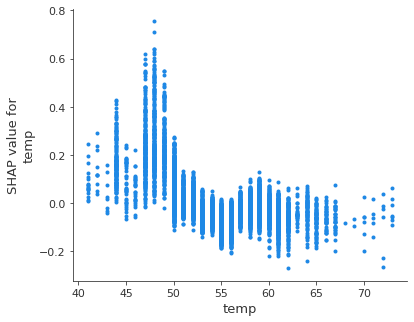

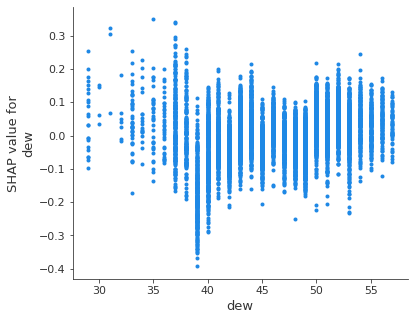

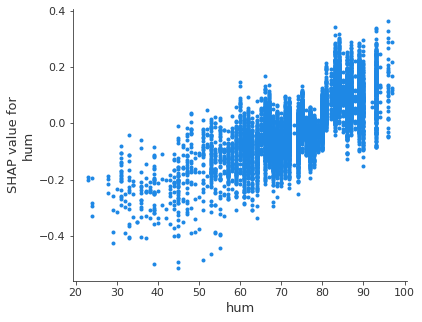

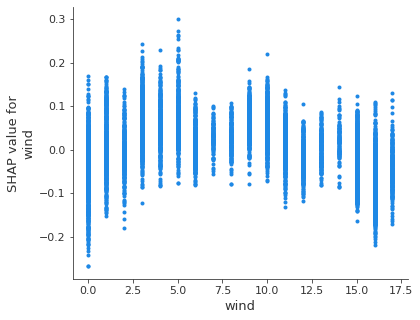

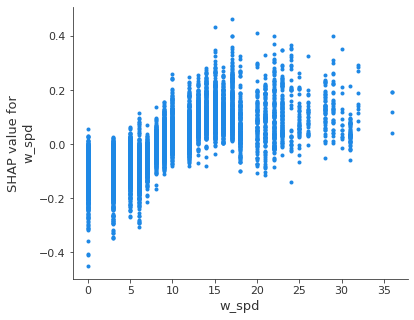

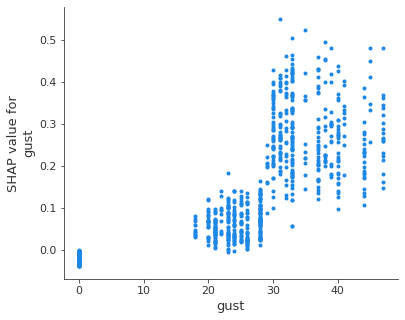

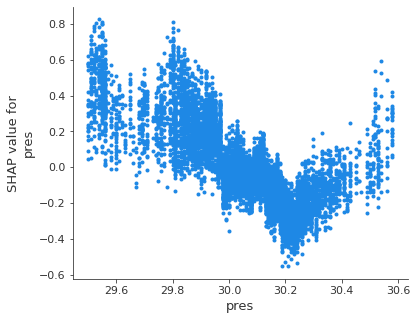

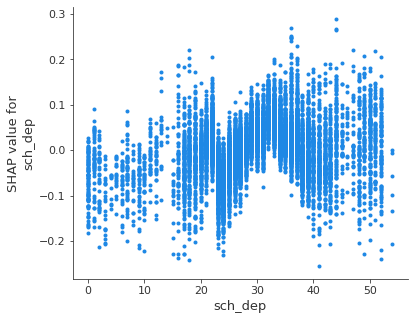

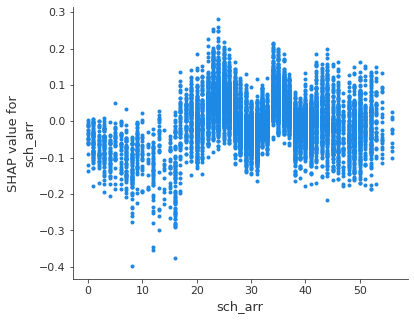

In [13]:
#for thresholds
for i in range(0,len(x_train.columns)):
    shap.dependence_plot(x_train.columns[i], shap_values, x_train, interaction_index=None)